# Lab04 Tasks
Asif Khan_ 
MS_AI (1st Semester)

# Data importing

In [2]:

from __future__ import print_function
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data_path = ['C:/Users/Administrator/Desktop/MS_AI PAF_IST/SM01/DS T&T Lab']
filepath = os.sep.join(data_path + ['iris.csv'])
df = pd.read_csv(filepath, sep=',')


In [3]:
print(df.shape[0])   # Rows=150

150


In [4]:
print(df.columns.tolist()) # Return the columns in df

['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


In [5]:
print(df.dtypes) # Return data types of attributes 

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [6]:
df["Species"]=df.Species.str.replace('Iris-',' ') # Removing ‘Iris-’ from "Species"

In [7]:
df["Species"]

0          setosa
1          setosa
2          setosa
3          setosa
4          setosa
          ...    
145     virginica
146     virginica
147     virginica
148     virginica
149     virginica
Name: Species, Length: 150, dtype: object

In [8]:
df["Species"].value_counts()    #The number of each species present

 setosa        50
 versicolor    50
 virginica     50
Name: Species, dtype: int64

In [9]:
desc=df.describe()  #Default values not containing range ... also median is not present
print(desc)

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [10]:
desc.loc['range']=desc.loc['max']-desc.loc['min']
measure=['mean','25%','50%','75%','range']
desc=desc.loc[measure]
desc.rename({'50%':'median'},inplace=True)
desc

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
mean,75.50,5.843333,3.054,3.758667,1.198667
25%,38.25,5.100000,2.800,1.600000,0.300000
median,75.50,5.800000,3.000,4.350000,1.300000
75%,112.75,6.400000,3.300,5.100000,1.800000
range,149.00,3.600000,2.400,5.900000,2.400000


In [11]:
dfn=df.drop(['Id'],axis=1)
dfn.groupby('Species').mean()    # calculate mean 


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [12]:
dfn=df.drop(['Id'],axis=1)
dfn.groupby('Species').median() # Calculate median

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [13]:
dfn=df.drop(['Id'],axis=1)
dfn.groupby('Species').agg(['mean','median']) # Using single function (agg) to calculate mean & median 

SepalLengthCm        SepalWidthCm        PetalLengthCm         \
                     mean median         mean median          mean median   
Species                                                                     
 setosa             5.006    5.0        3.418    3.4         1.464   1.50   
 versicolor         5.936    5.9        2.770    2.8         4.260   4.35   
 virginica          6.588    6.5        2.974    3.0         5.552   5.55   

            PetalWidthCm         
                    mean median  
Species                          
 setosa            0.244    0.2  
 versicolor        1.326    1.3  
 virginica         2.026    2.0

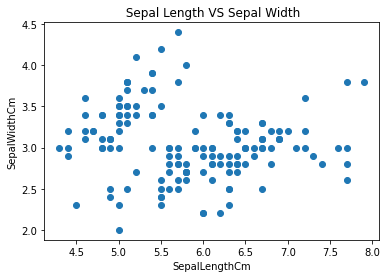

In [14]:
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'])
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.title(' Sepal Length VS Sepal Width')
plt.show()

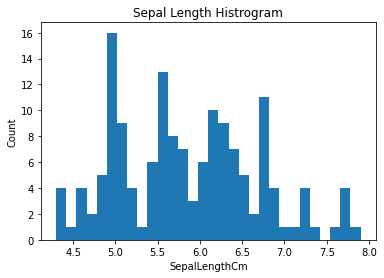

In [15]:
ax=plt.axes()
ax.hist(df.SepalLengthCm , bins=30 )
ax.set(xlabel='SepalLengthCm',
       ylabel='Count',
       title='Sepal Length Histrogram')
plt.show()

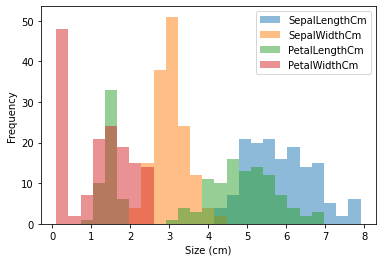

In [16]:
#sns.set_context('notebook')
ax =dfn.plot.hist(bins=25,alpha=0.5)
ax.set_xlabel('Size (cm)')
plt.show()

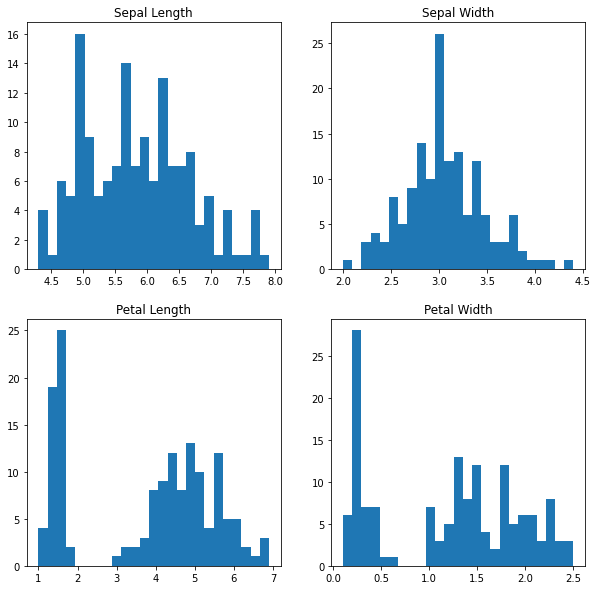

In [17]:
fig, axes=plt.subplots(2,2,figsize=(10,10))

axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df['SepalLengthCm'],bins=25)

axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df['SepalWidthCm'],bins=25)

axes[1,0].set_title("Petal Length")
axes[1,0].hist(df['PetalLengthCm'],bins=25)

axes[1,1].set_title("Petal Width")
axes[1,1].hist(df['PetalWidthCm'],bins=25)

plt.show()

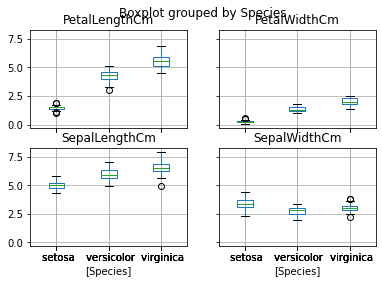

In [21]:
dfn.boxplot(by='Species')
plt.show()

In [22]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [23]:
data_format=(dfn
             .set_index('Species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size','level_1':'measurement'})
)
data_format.head()

,Species,measurement,size
0,setosa,SepalLengthCm,5.1
1,setosa,SepalWidthCm,3.5
2,setosa,PetalLengthCm,1.4
3,setosa,PetalWidthCm,0.2
4,setosa,SepalLengthCm,4.9


<AxesSubplot:xlabel='measurement', ylabel='size'>

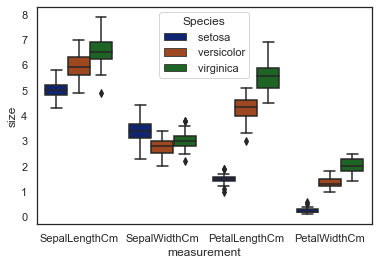

In [24]:
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')
f=plt.figure(figsize=(6,4))
sns.boxplot(x='measurement' , y='size', hue='Species' , data=data_format)

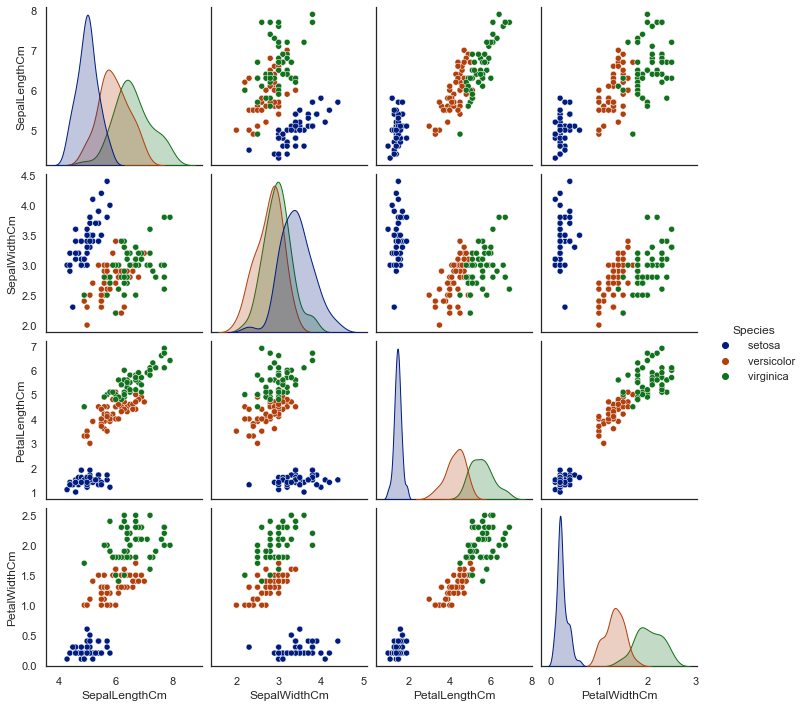

In [25]:
#sns.set_context('talk')
sns.pairplot(dfn , hue='Species')